In [78]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import glob

In [79]:
def gaussFit(x, a, x0, sigma):
    gauss = a*np.exp(-(x-x0)**2/(2*sigma**2))
    return gauss


Gp3_data_E1/co60\Co60_30_1_805v.csv
[140, 6840, 175]
[ 118.95483389 6831.1477159   211.13602997]
Centre: 6831.147715896691 +/- 211.13602996848505
[140, 7750, 250]
[ 110.         7748.31646027  198.71213806]
Centre: 7748.316460272893 +/- 198.71213806015712


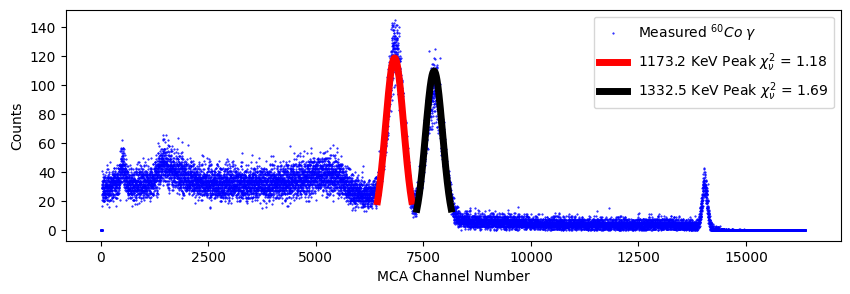

Gp3_data_E1/co60\Co60_30_2_805v.csv
[140, 6840, 175]
[ 120.80116769 6840.61216449  207.32551062]
Centre: 6840.612164494383 +/- 207.32551062292825
[140, 7750, 250]
[ 110.         7758.62138329  197.75521127]
Centre: 7758.62138329455 +/- 197.7552112675631


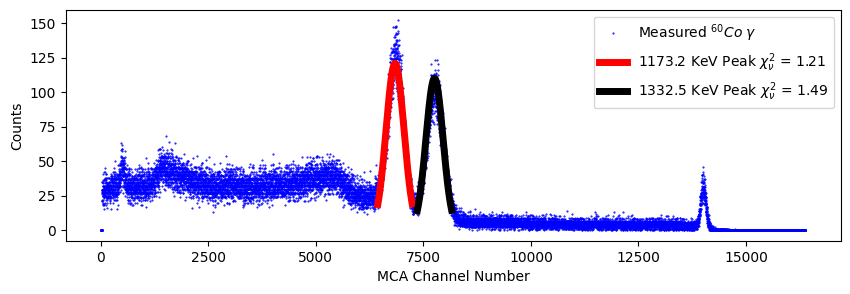

Gp3_data_E1/co60\Co60_30_3_805v.csv
[140, 6840, 175]
[ 121.16494335 6831.31185743  206.59954641]
Centre: 6831.311857432626 +/- 206.5995464114098
[140, 7750, 250]
[ 110.         7749.63640746  197.38111923]
Centre: 7749.636407464348 +/- 197.38111922669623


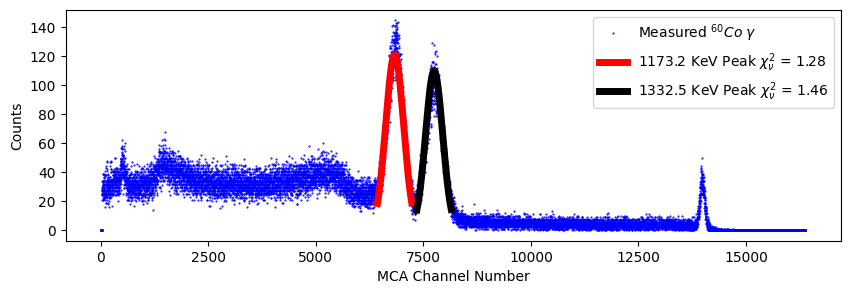

In [80]:
co60files = glob.glob('Gp3_data_E1/co60/*.csv')
with open("co60Fits.csv", "w") as fp:
    fp.write("Peak1,Peak1Error,Peak2,Peak2Error\n")
    j = 0
    for co60file in co60files:
        print(co60file)
        data = pd.read_csv(co60file, skiprows=6)
        #using poisson errors
        data["uncs"] = np.sqrt(data["Counts"]) + 1e-9
        plt.figure(figsize=(10, 3))
        p0s = [[140, 6840, 175], [140, 7750, 250]]
        plt.plot(data["Channel"], data["Counts"],'bo', label=r"Measured $^{60}Co$ $\gamma$", markersize=0.5)
        labels = ["1173.2 KeV Peak", "1332.5 KeV Peak"]
        colors = ["r-", "k-"]
        for i, p0 in enumerate(p0s):
            print(p0)
            bounds = [[p0[0]-30, p0[1]-200, p0[2]-200], [p0[0]+30, p0[1]+200, p0[2]+200]]
            popt, pcov = curve_fit(gaussFit, data["Channel"].to_numpy()[p0[1]-400:p0[1]+400], data["Counts"].to_numpy()[p0[1]-400:p0[1]+400], p0=p0, bounds=bounds, sigma=data["uncs"].to_numpy()[p0[1]-400:p0[1]+400], absolute_sigma=True)
            print(popt)
            centre = popt[1]
            error = popt[2]
            chisqaure = np.sum((gaussFit(data["Channel"][int(centre)-400:int(centre)+400], *popt) - data["Counts"][int(centre)-400:int(centre)+400])**2 / data["uncs"][int(centre)-400:int(centre)+400]**2)/(len(data["uncs"][int(centre)-400:int(centre)+400])-3)
            label = labels[i] + rf" $\chi^2_\nu$ = {chisqaure:.2f}"
            # error = np.sqrt(np.diag(pcov))[1]
            if i == 0:
                fp.write(f"{centre},{error}")
            else:
                fp.write(f",{centre},{error}")
            
            print(f"Centre: {centre} +/- {error}")
            plt.plot(data["Channel"][int(centre)-400:int(centre)+400], gaussFit(data["Channel"][int(centre)-400:int(centre)+400], *popt), colors[i], linewidth=5, label=label)
        plt.legend()
        plt.xlabel('MCA Channel Number')
        plt.ylabel('Counts')
        plt.savefig(f"plots/co60{j}_fit.svg", bbox_inches='tight')
        j+=1
        plt.show()
        fp.write("\n")


Gp3_data_E1/na22\Na22_804_1.csv
[3440.35292955 2901.95059436  227.16922982]
Centre: 2901.950594355171 +/- 227.16922981640013
[ 513.04683395 7353.36999908  325.47725999]
Centre: 7353.3699990849655 +/- 325.4772599851366
[  311.83056181 10522.41472584   271.75676745]
Centre: 10522.414725842897 +/- 271.75676745196057


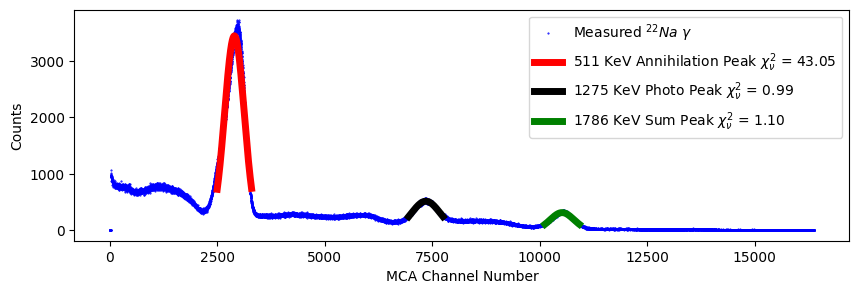

Gp3_data_E1/na22\Na22_804_2.csv
[3438.14777009 2901.74110389  227.39157469]
Centre: 2901.7411038868754 +/- 227.39157468809626
[ 514.65346995 7352.19561989  327.24668882]
Centre: 7352.195619888105 +/- 327.24668882380945
[  310.55603028 10522.99452952   272.96401923]
Centre: 10522.994529519892 +/- 272.9640192252592


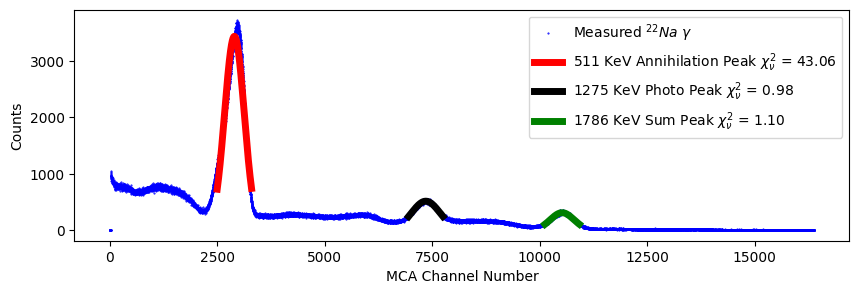

Gp3_data_E1/na22\Na22_804_3.csv
[3455.11544466 2897.0625303   224.84633574]
Centre: 2897.0625303036195 +/- 224.84633574336803
[ 511.10194127 7339.84634159  327.5382074 ]
Centre: 7339.846341592403 +/- 327.53820739899743
[  312.5036253  10504.88420936   270.15808534]
Centre: 10504.884209362737 +/- 270.1580853383242


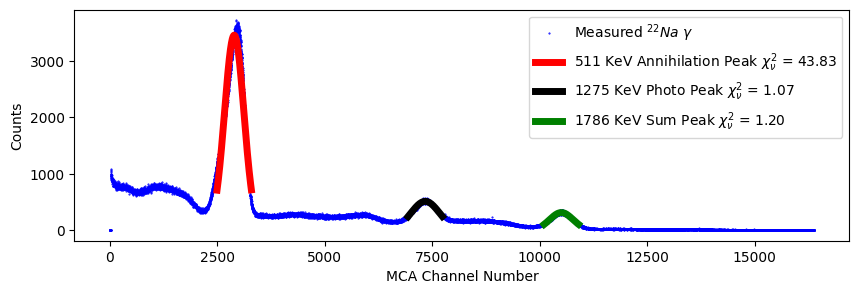

In [81]:
co60files = glob.glob('Gp3_data_E1/na22/*.csv')
with open("na22Fits.csv", "w") as fp:
    fp.write("Peak1,Peak1Error,Peak2,Peak2Error,Peak3,Peak3Error\n")
    j=0
    for co60file in co60files:
        print(co60file)
        data = pd.read_csv(co60file, skiprows=6)
        #using poisson errors
        data["uncs"] = np.sqrt(data["Counts"]) + 1e-9
        plt.figure(figsize=(10, 3))
        p0s = [[3500, 2900, 300], [700, 7350, 300], [400, 10500, 300]]
        plt.plot(data["Channel"], data["Counts"],'bo', label=r"Measured $^{22}Na$ $\gamma$", markersize=0.5)
        labels = ["511 KeV Annihilation Peak", "1275 KeV Photo Peak", "1786 KeV Sum Peak"]
        colors = ["r-", "k-", "g-"]
        for i, p0 in enumerate(p0s):
            bounds = [[p0[0]-500, p0[1]-500, p0[2]-200], [p0[0]+500, p0[1]+500, p0[2]+200]]
            popt, pcov = curve_fit(gaussFit, data["Channel"].to_numpy()[p0[1]-400:p0[1]+400], data["Counts"].to_numpy()[p0[1]-400:p0[1]+400], p0=p0, bounds=bounds, sigma=data["uncs"].to_numpy()[p0[1]-400:p0[1]+400], absolute_sigma=True)
            print(popt)
            centre = popt[1]
            error = popt[2]
            chisqaure = np.sum((gaussFit(data["Channel"][int(centre)-400:int(centre)+400], *popt) - data["Counts"][int(centre)-400:int(centre)+400])**2 / data["uncs"][int(centre)-400:int(centre)+400]**2)/(len(data["uncs"][int(centre)-400:int(centre)+400])-3)
            label = labels[i] + rf" $\chi^2_\nu$ = {chisqaure:.2f}"
            # error = np.sqrt(np.diag(pcov))[1]
            if i == 0:
                fp.write(f"{centre},{error}")
            else:
                fp.write(f",{centre},{error}")
            
            print(f"Centre: {centre} +/- {error}")
            plt.plot(data["Channel"][int(centre)-400:int(centre)+400], gaussFit(data["Channel"][int(centre)-400:int(centre)+400], *popt), colors[i], linewidth=5 , label=label)
        plt.legend()
        plt.xlabel('MCA Channel Number')
        plt.ylabel('Counts')
        plt.savefig(f"plots/na22{j}_fit.svg", bbox_inches='tight')
        j+=1
        plt.show()
        fp.write("\n")


Gp3_data_E1/na22\Na22_804_3.csv
[1800, 1110, 300]
[1786.31577601 1085.02859692  491.50942502]
Centre: 1085.028596919349 +/- 491.50942502023776
[1050, 2770, 250]
[1074.86770822 2790.56084838  450.        ]
Centre: 2790.5608483833894 +/- 449.99999999999994
[700, 5160, 250]
[ 702.8471106  5150.66866366  450.        ]
Centre: 5150.668663658095 +/- 449.99999999999994


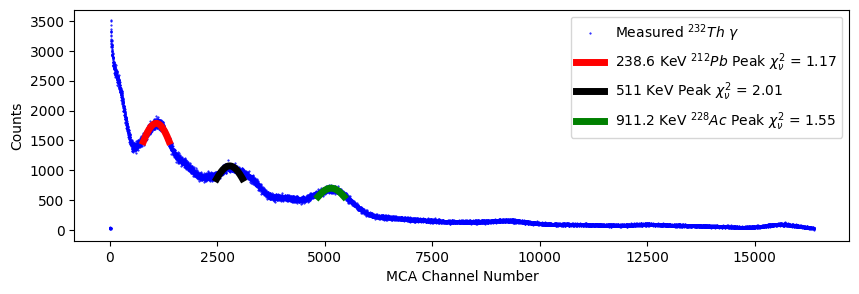

Gp3_data_E1/na22\Na22_804_3.csv
[1800, 1110, 300]
[3083.05969731 1079.30502788  490.36861185]
Centre: 1079.3050278833564 +/- 490.3686118500149
[1050, 2770, 250]
[1860.4692203  2786.89566592  450.        ]
Centre: 2786.8956659189153 +/- 449.99999999999994
[700, 5160, 250]
[1211.69394818 5135.30798513  450.        ]
Centre: 5135.3079851339435 +/- 449.99999999999994


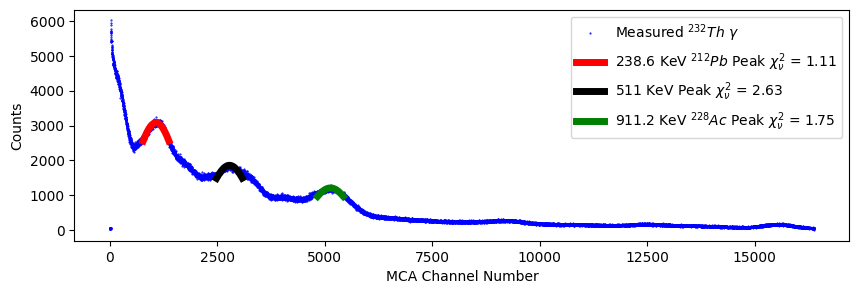

Gp3_data_E1/na22\Na22_804_3.csv
[1800, 1110, 300]
[3094.76399558 1077.28122479  489.06940458]
Centre: 1077.2812247867926 +/- 489.06940457655185
[1050, 2770, 250]
[1867.03615326 2781.61817938  450.        ]
Centre: 2781.618179376949 +/- 449.99999999999994
[700, 5160, 250]
[1212.1446564  5126.83610569  450.        ]
Centre: 5126.836105691027 +/- 449.99999999999994


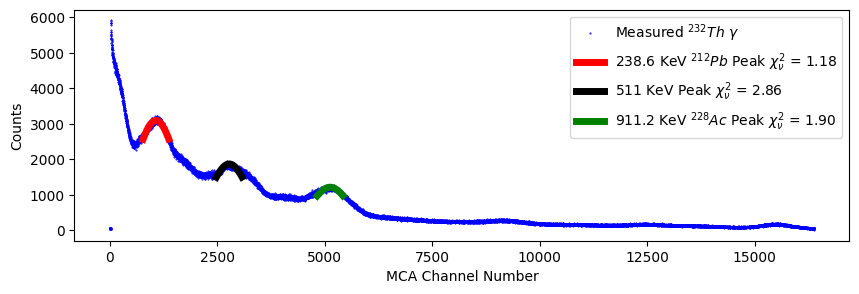

In [84]:
th02files = glob.glob('Gp3_data_E1/th02/*.csv')
with open("th232Fits.csv", "w") as fp:
    fp.write("Peak1,Peak1Error,Peak2,Peak2Error,Peak3,Peak3Error\n")
    j=0
    for th02file in th02files:
        print(co60file)
        data = pd.read_csv(th02file, skiprows=6)
        #using poisson errors
        data["uncs"] = np.sqrt(data["Counts"]) + 1e-9
        plt.figure(figsize=(10, 3))
        plt.plot(data["Channel"], data["Counts"],'bo', label=r"Measured $^{232}Th$ $\gamma$", markersize=0.5)
        p0s = [[1800, 1110, 300], [1050, 2770, 250], [700, 5160, 250]]
        labels = [r"238.6 KeV $^{212}Pb$ Peak", r"511 KeV Peak", r"911.2 KeV $^{228}Ac$ Peak"]
        colors = ["r-", "k-", "g-"]
        for i, p0 in enumerate(p0s):
            print(p0)
            bounds = [[p0[0]-1500, p0[1]-200, p0[2]-200], [p0[0]+1500, p0[1]+200, p0[2]+200]]
            popt, pcov = curve_fit(gaussFit, data["Channel"].to_numpy()[p0[1]-300:p0[1]+300], data["Counts"].to_numpy()[p0[1]-300:p0[1]+300], p0=p0, bounds=bounds, sigma=data["uncs"].to_numpy()[p0[1]-300:p0[1]+300], absolute_sigma=True)
            print(popt)
            centre = popt[1]
            error = popt[2]
            chisqaure = np.sum((gaussFit(data["Channel"][int(centre)-300:int(centre)+300], *popt) - data["Counts"][int(centre)-300:int(centre)+300])**2 / data["uncs"][int(centre)-300:int(centre)+300]**2)/(len(data["uncs"][int(centre)-300:int(centre)+300])-3)
            label = labels[i] + rf" $\chi^2_\nu$ = {chisqaure:.2f}"
            # error = np.sqrt(np.diag(pcov))[1]
            if i == 0:
                fp.write(f"{centre},{error}")
            else:
                fp.write(f",{centre},{error}")
            
            print(f"Centre: {centre} +/- {error}")
            plt.plot(data["Channel"][int(centre)-300:int(centre)+300], gaussFit(data["Channel"][int(centre)-300:int(centre)+300], *popt), colors[i], linewidth=5 , label=label)
        plt.legend()
        plt.xlabel('MCA Channel Number')
        plt.ylabel('Counts')
        plt.savefig(f"plots/th232{j}_fit.svg", bbox_inches='tight')
        j+=1
        plt.show()
        fp.write("\n")

[10000, 3110, 300]
[10580.62348392  3155.76191979   373.00990262]
Centre: 3155.761919788685 +/- 373.00990262032116
Centre: 3155.761919788685 +/- 373.00990262032116


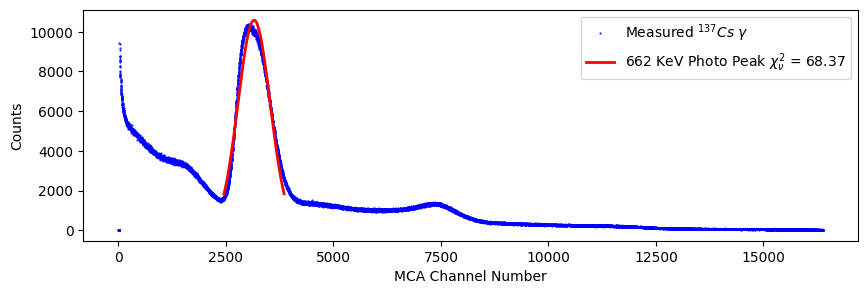

[10000, 3110, 300]
[10596.40789129  3109.64592326   376.14576223]
Centre: 3109.6459232577254 +/- 376.145762232376
Centre: 3109.6459232577254 +/- 376.145762232376


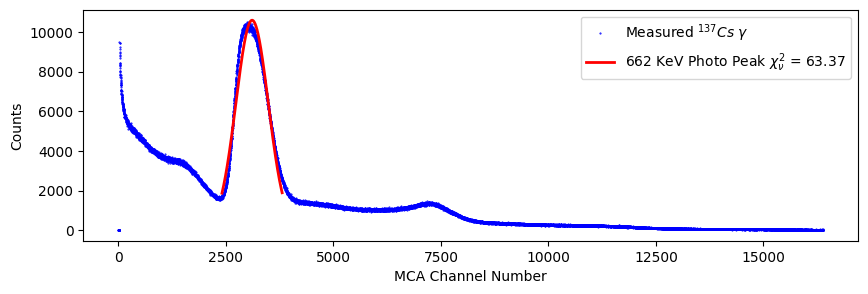

[10000, 3110, 300]
[10693.22301763  3059.9210899    381.39944287]
Centre: 3059.921089902075 +/- 381.3994428691824
Centre: 3059.921089902075 +/- 381.3994428691824


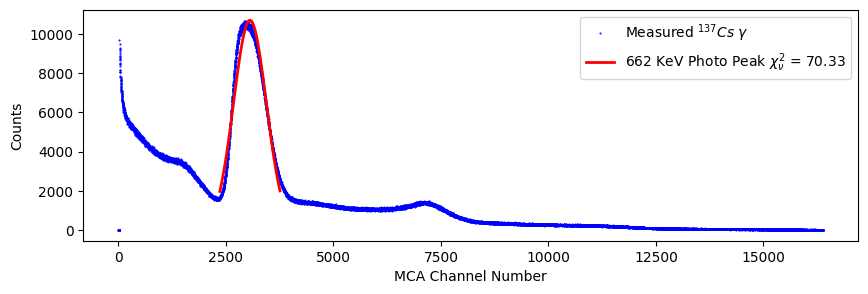

In [83]:
th02files = glob.glob('Gp3_data_E1/cs137/*.csv')
with open("cs137Fits.csv", "w") as fp:
    fp.write("Peak1,Peak1Error,Peak2,Peak2Error,Peak3,Peak3Error\n")
    j=0
    for th02file in th02files:
        data = pd.read_csv(th02file, skiprows=6)
        #using poisson errors
        data["uncs"] = np.sqrt(data["Counts"]) + 1e-9
        plt.figure(figsize=(10, 3))
        plt.plot(data["Channel"], data["Counts"],'bo', label=r"Measured $^{137}Cs$ $\gamma$", markersize=0.5)
        p0s = [[10000, 3110, 300]]
        labels = [r"662 KeV Photo Peak"]
        for i, p0 in enumerate(p0s):
            print(p0)
            bounds = [[p0[0]-1500, p0[1]-200, p0[2]-200], [p0[0]+1500, p0[1]+200, p0[2]+200]]
            popt, pcov = curve_fit(gaussFit, data["Channel"].to_numpy()[p0[1]-700:p0[1]+700], data["Counts"].to_numpy()[p0[1]-700:p0[1]+700], p0=p0, bounds=bounds, sigma=data["uncs"].to_numpy()[p0[1]-700:p0[1]+700], absolute_sigma=True)
            print(popt)
            centre = popt[1]
            error=popt[2]
            # error = np.sqrt(np.diag(pcov))[1]
            if i == 0:
                fp.write(f"{centre},{error}")
            else:
                fp.write(f",{centre},{error}")
            chisqaure = np.sum((gaussFit(data["Channel"][int(centre)-700:int(centre)+700], *popt) - data["Counts"][int(centre)-700:int(centre)+700])**2 / data["uncs"][int(centre)-700:int(centre)+700]**2)/(len(data["uncs"][int(centre)-700:int(centre)+700])-3)
            label = labels[i] + rf" $\chi^2_\nu$ = {chisqaure:.2f}"
            print(f"Centre: {centre} +/- {error}")
            print(f"Centre: {centre} +/- {error}")
            plt.plot(data["Channel"][int(centre)-700:int(centre)+700], gaussFit(data["Channel"][int(centre)-700:int(centre)+700], *popt), colors[i], linewidth=2, label=label)
        plt.legend()
        plt.xlabel('MCA Channel Number')
        plt.ylabel('Counts')
        plt.savefig(f"plots/cs137{j}_fit.svg", bbox_inches='tight')
        j+=1
        plt.show()
        fp.write("\n")